In [11]:
import numpy as np
from sklearn.linear_model import Ridge
from data.parameters import XI_16
import matplotlib.pyplot as plt

In [12]:
# Data
data = XI_16
# order data by x value
data = sorted(data, key=lambda x: x[0])
# find max absolute y value
max_y = max(abs(x[1]) for x in data)
# normalize data
data = [(x[0], x[1]/max_y) for x in data]




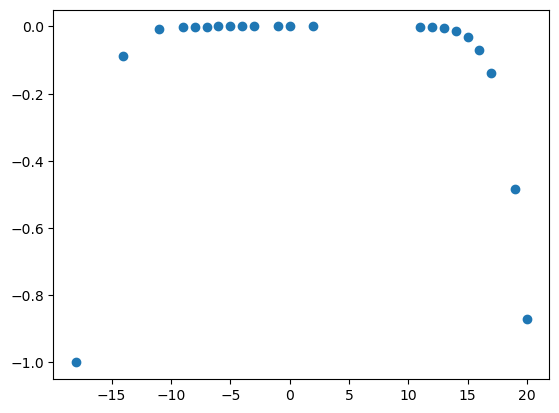

In [13]:
# Prepare the data
x = np.array([point[0] for point in data])
y = np.array([point[1] for point in data])

# plot the data points
plt.scatter(x, y, label='Data Points')


# ridge regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Define penalties for Ridge regression
# list from 1 to 30
penalties = np.linspace(-2,2,15)
lambdas=np.power(10.0, penalties)
x = x.reshape(-1, 1)

# Degree of the polynomial
degree = 10

# Polynomial features transformation
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))

In [15]:

# Ordinary Least Squares (OLS)
ols_model = LinearRegression()
ols_model.fit(X_poly, y)
y_pred_ols = ols_model.predict(X_poly)
mse_ols = mean_squared_error(y, y_pred_ols)

In [18]:
# create an array from -25 to 25
x_plot = np.arange(-25, 25, 0.1)
# apply the ols fit
y_ols_plot = ols_model.predict(poly.fit_transform(x_plot.reshape(-1, 1)))

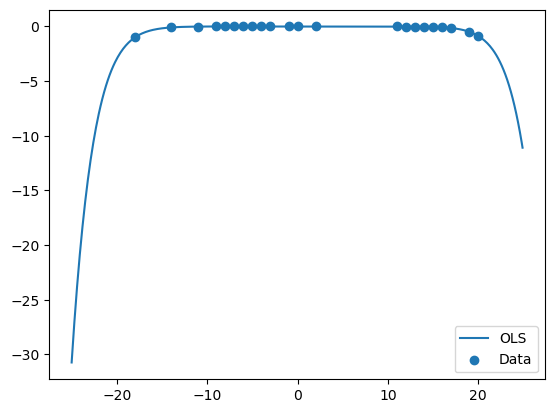

In [19]:
# plot the data and the OLS fit
plt.plot(x_plot, y_ols_plot, label='OLS')
plt.scatter(x, y, label='Data')
plt.legend()
plt.show()


In [73]:
# plot the polynomial fit
x = np.linspace(-20, 20, 100)
y = ols_model.predict(x)
plt.plot(x, y)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.66666667   7.07070707   7.47474747   7.87878788
   8.28282828   8.68686869   9.09090909   9.49494949   9.8989899
  10.3030303   10.70707071  11.11111111  11.51515152  11.91919192
  12.32323232  12.72727273  13.13131313  13.53535354  13.93939394
  14.34343434  14.74747475  15.15151515  15.55555556  15.95959596
  16.36363636  16.76767677  17.17171717  17.57575758  17.97979798
  18.38383838  18.78787879  19.19191919  19.5959596   20.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

c:\Users\DimiP\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.142e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\DimiP\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.3789e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\DimiP\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.66225e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\DimiP\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.13999e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\User

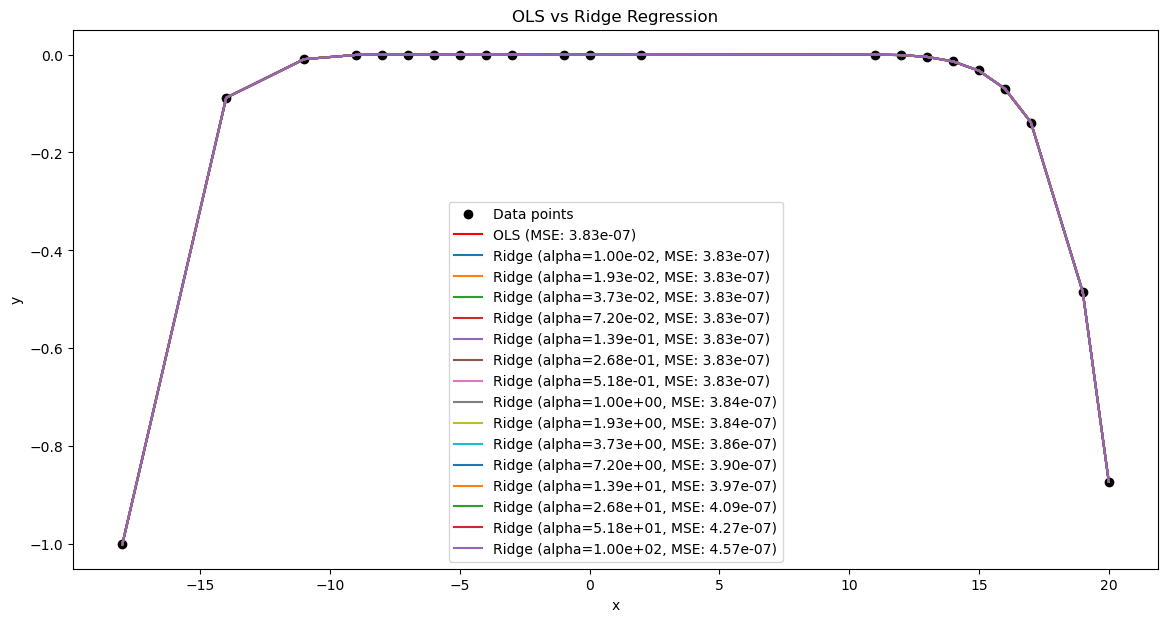

In [64]:




ridge_models = []
mse_ridge = []


for alpha in lambdas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly, y)
    y_pred_ridge = ridge.predict(X_poly)
    ridge_models.append(ridge)
    mse_ridge.append(mean_squared_error(y, y_pred_ridge))




# Plotting the results
plt.figure(figsize=(14, 7))
plt.scatter(x, y, color='black', label='Data points')
# OLS model plot
plt.plot(x, y_pred_ols, label=f'OLS (MSE: {mse_ols:.2e})', color='red')
# Ridge models plot
# colors = ['blue', 'green', 'orange', 'purple']
for idx, (alpha, mse) in enumerate(zip(lambdas, mse_ridge)):
    plt.plot(x, ridge_models[idx].predict(X_poly), label=f'Ridge (alpha={alpha:.2e}, MSE: {mse:.2e})')

plt.title('OLS vs Ridge Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()